In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Define normalization and denormalization functions

In [4]:
def normalize_wavelength(wavelength):
    return (wavelength * 10 ** 6)  #in the given datasets, wavelength is of the order of micrometers so multiplying with 10^6
def normalize_radiance(radiance):
    return (radiance * 10 ** -12)  #radiance is of the order of 10*12 
def denormalize_wavelength(wavelength):
    return (wavelength * 10**-6)   #denormalizing wavelength by multiplying it with 10^-6
def denormalize_radiance(radiance):
    return (radiance * 10 ** 12)   #denormalizing radiance by multiplying it with 10^12


# Plotting the given data by normalizing it using the above functions

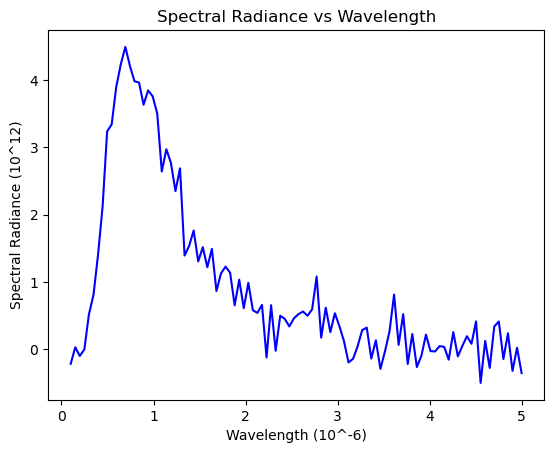

In [102]:
data = np.loadtxt('d1.csv', delimiter=',')

x_data1 = normalize_wavelength(data[:, 0])   #take the 0th column of every line
y_data1 = normalize_radiance(data[:, 1])     #take the 1st column of every line   

plt.plot(x_data1, y_data1, color='b')
plt.xlabel('Wavelength (10^-6)')
plt.ylabel('Spectral Radiance (10^12)')
plt.title('Spectral Radiance vs Wavelength')
plt.show()

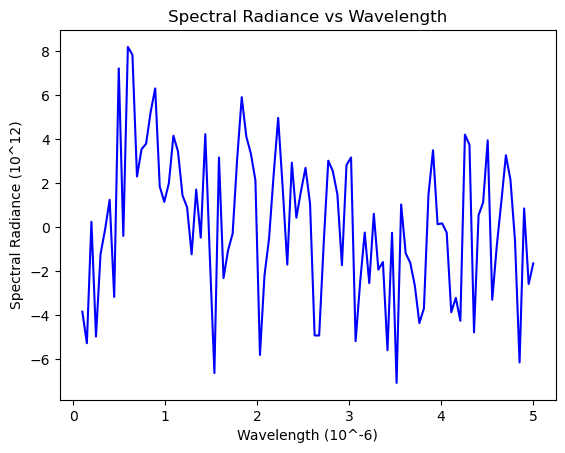

In [103]:
data = np.loadtxt('d2.csv', delimiter=',')

x_data2 = normalize_wavelength(data[:, 0])  
y_data2 = normalize_radiance(data[:, 1])          

plt.plot(x_data2, y_data2, color='b')
plt.xlabel('Wavelength (10^-6)')
plt.ylabel('Spectral Radiance (10^12)')
plt.title('Spectral Radiance vs Wavelength')
plt.show()

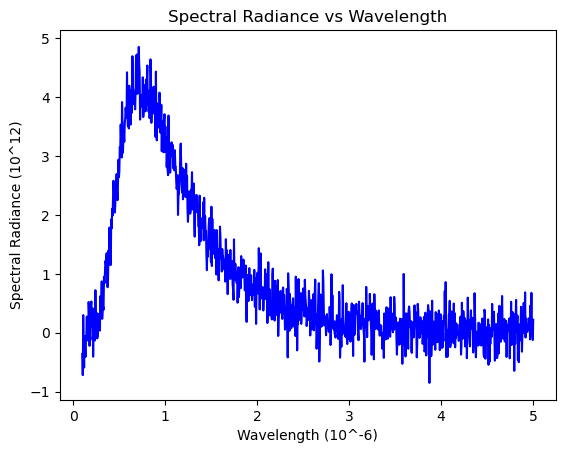

In [104]:
data = np.loadtxt('d3.csv', delimiter=',')

x_data3 = normalize_wavelength(data[:, 0])  
y_data3 = normalize_radiance(data[:, 1])         

plt.plot(x_data3, y_data3, color='b')
plt.xlabel('Wavelength (10^-6)')
plt.ylabel('Spectral Radiance (10^12)')
plt.title('Spectral Radiance vs Wavelength')
plt.show()

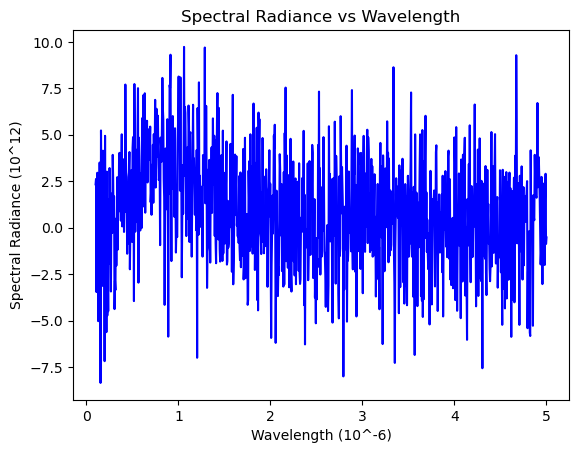

In [105]:
data = np.loadtxt('d4.csv', delimiter=',')

x_data4 = normalize_wavelength(data[:, 0])   
y_data4 = normalize_radiance(data[:, 1])         

plt.plot(x_data4, y_data4, color='b')
plt.xlabel('Wavelength (10^-6)')
plt.ylabel('Spectral Radiance (10^12)')
plt.title('Spectral Radiance vs Wavelength')
plt.show()

# Defining the function planck and curve fitting

In [106]:
#this function takes in l : wavelength, h : planck's constant, c : speed of light, k : boltzmann constant, t : temperature as variables and returns a value or another function based upon what is given as input
def planck(l, h, c, k, t):
    return (2 * h * c * c) / ((l ** 5) * ((np.exp(np.clip((h * c) / (l * k * t), None, 700))) - 1))

normalized wavelength(x_datai) (i = 1 2 3 4) and radiance(y_datai) are converted in numpy arrays and stored in values_x and values_y respectively
now curve_fit is done by giving only values_x as input to the planck function. 
So now planck returns another funtion that is in terms of h, c, k and t
These arguments are estimated by the curve_fit functions and their "scaled" values are returned(because the inputs to curve_fit, x_data1 and y_data1 are scaled)

Our formula is like this:

    R = 2h*(c^2)/((l^5)*(e ^ (hc/lkt) - 1))

Normalization is done by multiplying R with 10^-12 and l with 10^6
To compensate for this normalization,

    h(c^2) should be of the order 10^-18 ((5 * -6) + 12)
    hc/kt should be of the order 10 ^ 6 (l in the denominator)
    
by choosing the below scaling, the above conditions are satisfied:

    h scaled to actual h * 10 ^ 34
    c scaled to actual c * 10 ^ -8
    k scaled to actual k * 10 ^ 23
    t scaled to actual t * 10 ^ -3
    
So the actual value of:

    h will be h * 10 ^ -34
    c will be c * 10 ^ -8
    k will be k * k * 10 ^ 23
    t will be t * 10 ^ -3

And they are printed as shown below.

Finally radiance is estimated using these parameters and plotted.

The same thing is done for all the 4 datasets

ARGS [4.87610575 3.44755827 2.32263091 2.03326253]
h:4.876105751797916e-34
c:344755827.2159876
k:2.3226309079802897e-23
t:2033.2625269987577


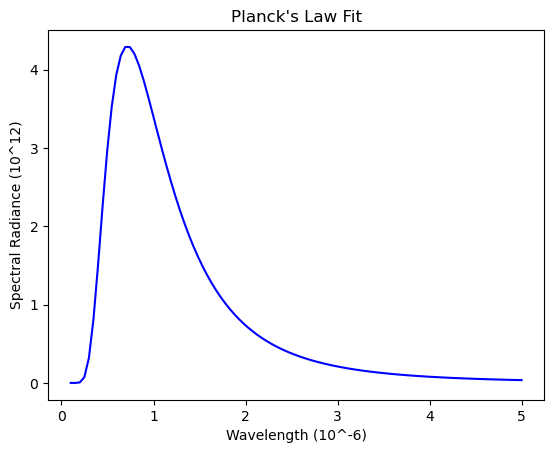

In [108]:
values_x = np.array(x_data1)
values_y = np.array(y_data1)
args, covar = scipy.optimize.curve_fit(planck, values_x, values_y)
print("ARGS", args)
h, c, k, t = float(args[0]), float(args[1]), float(args[2]), float(args[3])

print(f"h:{h*10**-34}")
print(f"c:{c*10**8}")
print(f"k:{k*10**-23}")
print(f"t:{t*10**3}")


x_data1 = np.array(x_data1, dtype=float)
y_est1 = planck(np.array(x_data1), h, c, k, t) 
plt.plot(x_data1, y_est1, color='b')
plt.xlabel('Wavelength (10^-6)')
plt.ylabel('Spectral Radiance (10^12)')
plt.title("Planck's Law Fit")
plt.show()

ARGS [1.74015938 4.70454415 1.48874551 1.64741822]
h :1.740159376377959e-34
c :470454415.0924492
k :1.4887455134654015e-23
t :1647.4182235610915


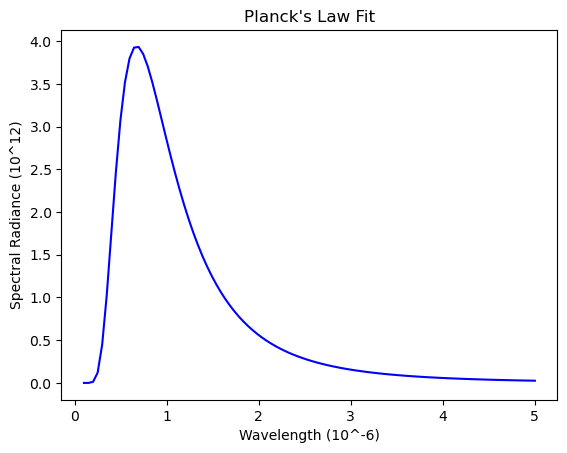

In [109]:
values_x = np.array(x_data2)
values_y = np.array(y_data2)
args, covar = scipy.optimize.curve_fit(planck, values_x, values_y)
print("ARGS", args)

h, c, k, t = float(args[0]), float(args[1]), float(args[2]), float(args[3])

print(f"h :{h*10**-34}")
print(f"c :{c*10**8}")
print(f"k :{k*10**-23}")
print(f"t :{t*10**3}")


x_data2 = np.array(x_data2, dtype=float)
y_est2 = planck(np.array(x_data2), h, c, k, t) 
plt.plot(x_data2, y_est2, color='b')
plt.xlabel('Wavelength (10^-6)')
plt.ylabel('Spectral Radiance (10^12)')
plt.title("Planck's Law Fit")
plt.show()

ARGS [6.04257004 3.05827852 2.60403333 1.99416566]
h :6.0425700441963795e-34
c :305827852.3564465
k :2.604033331574963e-23
t :1994.165661770077


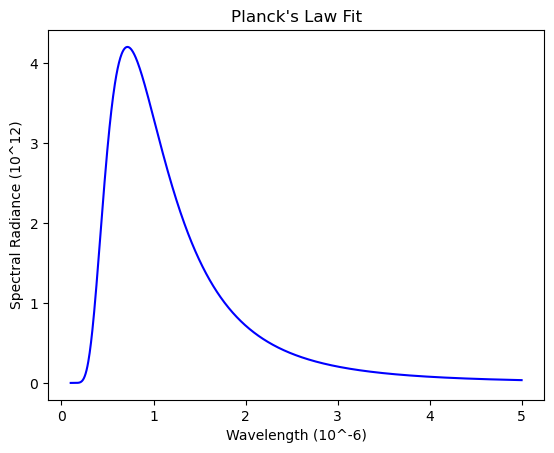

In [110]:
values_x = np.array(x_data3)
values_y = np.array(y_data3)
args, covar = scipy.optimize.curve_fit(planck, values_x, values_y)
print("ARGS", args)

h, c, k, t = float(args[0]), float(args[1]), float(args[2]), float(args[3])

print(f"h :{h*10**-34}")
print(f"c :{c*10**8}")
print(f"k :{k*10**-23}")
print(f"t :{t*10**3}")


x_data3 = np.array(x_data3, dtype=float)
y_est3 = planck(np.array(x_data3), h, c, k, t) 
plt.plot(x_data3, y_est3, color='b')
plt.xlabel('Wavelength (10^-6)')
plt.ylabel('Spectral Radiance (10^12)')
plt.title("Planck's Law Fit")
plt.show()

ARGS [5.01096455 3.35307532 2.05602738 2.24285695]
h :5.0109645529885675e-34
c :335307531.8860455
k :2.0560273763899144e-23
t :2242.8569465626147


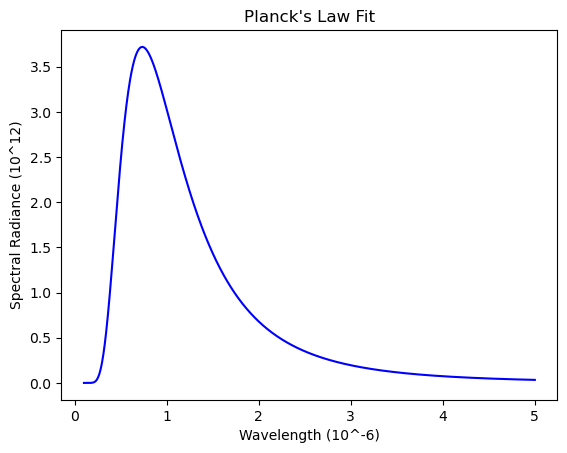

In [111]:
values_x = np.array(x_data4)
values_y = np.array(y_data4)
args, covar = scipy.optimize.curve_fit(planck, values_x, values_y)
print("ARGS", args)

h, c, k, t = float(args[0]), float(args[1]), float(args[2]), float(args[3])

print(f"h :{h*10**-34}")
print(f"c :{c*10**8}")
print(f"k :{k*10**-23}")
print(f"t :{t*10**3}")

x_data4 = np.array(x_data4, dtype=float)
y_est4 = planck(np.array(x_data4), h, c, k, t) 
plt.plot(x_data4, y_est4, color='b')
plt.xlabel('Wavelength (10^-6)')
plt.ylabel('Spectral Radiance (10^12)')
plt.title("Planck's Law Fit")
plt.show()

# kt is constant

The below 8 cells are to show that k and t arguments are interrelated and cannot be estimated seperately. It is shown that their product always remains constant and hence only kt can be estimated.

First T is fixed as 1, c as 3 and h as 6.626 and k is estimated
then T is changed to 2 and again k is estimated
this is done till T = 4


the following are the observations: 

    t = 1 k = 5.5521 -> kt = 5.5521 
    t = 2 k = 2.7760 -> kt = 5.552 
    t = 3 k = 1.8507 -> kt = 5.5521 
    t = 4 k = 1.3880 -> kt = 5.552 
    
    
Now the k is fixed as 1, c as 3 and h as 6.626 and T is estimated
then k is changed to 2 and again T is estimated
this is done till k = 4


the following are the observations:

    k = 1 t = 5.5521 -> kt = 5.5521
    k = 2 t = 2.7760 -> kt = 5.552
    k = 3 t = 1.8507 -> kt = 5.5521
    k = 4 t = 1.3880 -> kt = 5.552


the product kt remain constant for a given c and h values irrespective of the order which is predicted first.


In [86]:
def planck_fixed_constants(wavelength, k):
    h = 6.626  
    c = 3      
    T = 1  
    exponent = (h * c) / (wavelength * k * T)
    return (2 * h * c**2) / (wavelength**5 * (np.exp(np.clip(exponent, None, 700)) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data1, y_data1)

k_fit11 = params[0]
print(f"Estimated k: {k_fit11}")


Estimated k: 5.5521687775621755


In [87]:
def planck_fixed_constants(wavelength, k):
    h = 6.626  
    c = 3      
    T = 2  
    exponent = (h * c) / (wavelength * k * T)
    return (2 * h * c**2) / (wavelength**5 * (np.exp(np.clip(exponent, None, 700)) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data1, y_data1)

k_fit12 = params[0]
print(f"Estimated k: {k_fit12}")


Estimated k: 2.776084396711833


In [88]:
def planck_fixed_constants(wavelength, k):
    h = 6.626  
    c = 3      
    T = 3  
    exponent = (h * c) / (wavelength * k * T)
    return (2 * h * c**2) / (wavelength**5 * (np.exp(np.clip(exponent, None, 700)) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data1, y_data1)

k_fit13 = params[0]
print(f"Estimated k: {k_fit13}")


Estimated k: 1.850722923821096


In [89]:
def planck_fixed_constants(wavelength, k):
    h = 6.626  
    c = 3      
    T = 4  
    exponent = (h * c) / (wavelength * k * T)
    return (2 * h * c**2) / (wavelength**5 * (np.exp(np.clip(exponent, None, 700)) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data1, y_data1)

k_fit14 = params[0]
print(f"Estimated k: {k_fit14}")


Estimated k: 1.3880421919247468


In [98]:
def planck_fixed_constants(wavelength, T):
    h = 6.626  
    c = 3      
    k = 1  
    exponent = (h * c) / (wavelength * k * T)
    return (2 * h * c**2) / (wavelength**5 * (np.exp(np.clip(exponent, None, 700)) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data1, y_data1)

T_fit11 = params[0]
print(f"Estimated T: {T_fit11}")

Estimated T: 5.5521687775621755


In [99]:
def planck_fixed_constants(wavelength, T):
    h = 6.626  
    c = 3      
    k = 2 
    exponent = (h * c) / (wavelength * k * T)
    return (2 * h * c**2) / (wavelength**5 * (np.exp(np.clip(exponent, None, 700)) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data1, y_data1)

T_fit12 = params[0]
print(f"Estimated T: {T_fit12}")

Estimated T: 2.776084396711833


In [100]:
def planck_fixed_constants(wavelength, T):
    h = 6.626  
    c = 3      
    k = 3 
    exponent = (h * c) / (wavelength * k * T)
    return (2 * h * c**2) / (wavelength**5 * (np.exp(np.clip(exponent, None, 700)) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data1, y_data1)

T_fit13 = params[0]
print(f"Estimated T: {T_fit13}")

Estimated T: 1.850722923891631


In [113]:
def planck_fixed_constants(wavelength, T):
    h = 6.626  
    c = 3      
    k = 4 
    exponent = (h * c) / (wavelength * k * T)
    return (2 * h * c**2) / (wavelength**5 * (np.exp(np.clip(exponent, None, 700)) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data1, y_data1)

T_fit14 = params[0]
print(f"Estimated T: {T_fit14}")

Estimated T: 1.3880421919247468


# Implementing partial application
Fixing h, c and k first and predicting T
Then using this T_fit, T is fixed, c and k are still fixed and h is predicted as h_fit
Now fixing h = h_fit, T = T_fit, and k, c is predicted
Now fixing h = h_fit, T = T_fit, c = c_fit, k is predicted, but turns out it is almost 1.38 because kt is constant

Finally, the estimated graph is plotted

# d1

In [118]:
def planck_fixed_constants(wavelength, T):
    h = 6.626  
    c = 3      
    k = 1.38  
    exponent = (h * c) / (wavelength * k * T)
    return (2 * h * c**2) / (wavelength**5 * (np.exp(np.clip(exponent, None, 700)) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data1, y_data1)

T_fit1 = params[0]
#normalizing T
print(f"Estimated T: {T_fit1 * 10**3}")


Estimated T: 4023.3107002209285


In [119]:
def planck_fixed_constants(wavelength, h):
    T = T_fit1 
    c = 3      
    k = 1.38   
    return (2 * h * c * c) / ((wavelength ** 5) * ((np.exp(np.clip((h * c) / (wavelength * k * T), None, 700))) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data1, y_data1)

h_fit1 = params[0]
#normalizing h
print(f"Estimated h: {h_fit1 * 10**-34}")


Estimated h: 6.624758316349462e-34


In [120]:
def planck_fixed_constants(wavelength, c):
    T = T_fit1 
    h = h_fit1      
    k = 1.38   
    return (2 * h * c * c) / ((wavelength ** 5) * ((np.exp(np.clip((h * c) / (wavelength * k * T), None, 700))) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data1, y_data1)

c_fit1 = params[0]
#normalizing c
print(f"Estimated c: {c_fit1 * 10**8}")


Estimated c: 299879844.5950914


In [121]:
def planck_fixed_constants(wavelength, k):
    T = T_fit1 
    h = h_fit1      
    c = c_fit1   
    return (2 * h * c * c) / ((wavelength ** 5) * ((np.exp(np.clip((h * c) / (wavelength * k * T), None, 700))) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data1, y_data1)

k_fit1 = params[0]
#normalizing k
print(f"Estimated k: {k_fit1 * 10**-23}")

Estimated k: 1.3794640084781227e-23


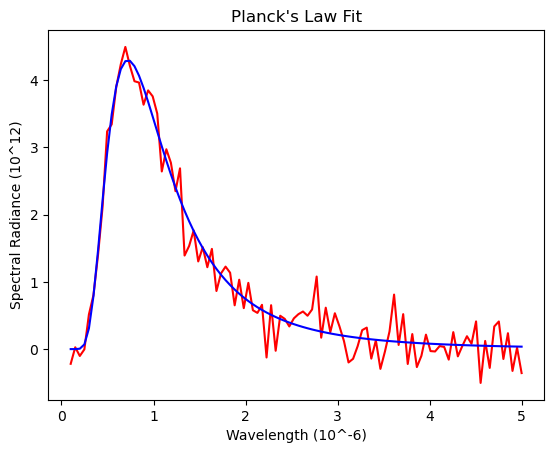

In [114]:
h, c, k, t = h_fit1, c_fit1, k_fit1, T_fit1
x_data1 = np.array(x_data1, dtype=float)
y_est1 = planck(np.array(x_data1), h, c, k, t) 
plt.xlabel('Wavelength (10^-6)')
plt.ylabel('Spectral Radiance (10^12)')
plt.title("Planck's Law Fit")
plt.plot(x_data1, y_data1, color = 'r')
plt.plot(x_data1, y_est1, color='b')
plt.show()

# d2

In [123]:
def planck_fixed_constants(wavelength, T):
    h = 6.626  
    c = 3      
    k = 1.38  
    exponent = (h * c) / (wavelength * k * T)
    return (2 * h * c**2) / (wavelength**5 * (np.exp(np.clip(exponent, None, 700)) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data2, y_data2)

T_fit2 = params[0]
#normalizing T
print(f"Estimated T: {T_fit2 * 10**3}")


Estimated T: 107.6426937774817


In [124]:
def planck_fixed_constants(wavelength, h):
    T = T_fit2 
    c = 3      
    k = 1.38   
    return (2 * h * c * c) / ((wavelength ** 5) * ((np.exp(np.clip((h * c) / (wavelength * k * T), None, 700))) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data2, y_data2)

h_fit2 = params[0]
#normalizing h
print(f"Estimated h: {h_fit2 * 10**-34}")


Estimated h: 1.0099999999999995e-32


In [125]:
def planck_fixed_constants(wavelength, c):
    T = T_fit2 
    h = h_fit2      
    k = 1.38   
    return (2 * h * c * c) / ((wavelength ** 5) * ((np.exp(np.clip((h * c) / (wavelength * k * T), None, 700))) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data2, y_data2)

c_fit2 = params[0]
#normalizing c
print(f"Estimated c: {c_fit2 * 10**8}")


Estimated c: 100000000.0


In [126]:
def planck_fixed_constants(wavelength, k):
    T = T_fit2 
    h = h_fit2     
    c = c_fit2   
    return (2 * h * c * c) / ((wavelength ** 5) * ((np.exp(np.clip((h * c) / (wavelength * k * T), None, 700))) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data2, y_data2)

k_fit2 = params[0]
#normalizing k
print(f"Estimated k: {k_fit2 * 10**-23}")

Estimated k: 1e-23


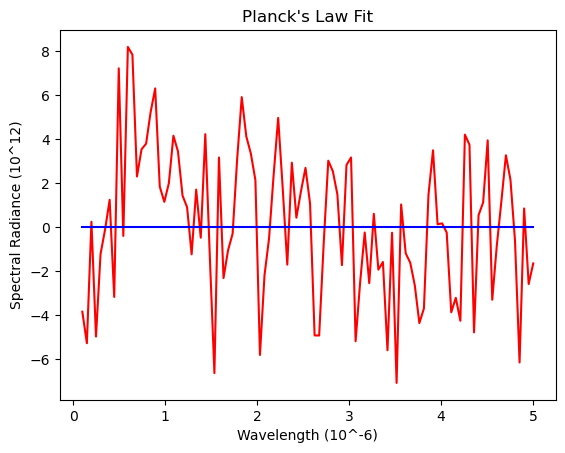

In [115]:
h, c, k, t = h_fit2, c_fit2, k_fit2, T_fit2
x_data2 = np.array(x_data2, dtype=float)
y_est2 = planck(np.array(x_data2), h, c, k, t) 
plt.xlabel('Wavelength (10^-6)')
plt.ylabel('Spectral Radiance (10^12)')
plt.title("Planck's Law Fit")
plt.plot(x_data2, y_data2, color = 'r')
plt.plot(x_data2, y_est2, color='b')
plt.show()

# d3

In [127]:
def planck_fixed_constants(wavelength, T):
    h = 6.626  
    c = 3      
    k = 1.38  
    exponent = (h * c) / (wavelength * k * T)
    return (2 * h * c**2) / (wavelength**5 * (np.exp(np.clip(exponent, None, 700)) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data3, y_data3)

T_fit3 = params[0]
#normalizing T
print(f"Estimated T: {T_fit3 * 10**3}")


Estimated T: 4003.9998430097166


In [128]:
def planck_fixed_constants(wavelength, h):
    T = T_fit3 
    c = 3      
    k = 1.38   
    return (2 * h * c * c) / ((wavelength ** 5) * ((np.exp(np.clip((h * c) / (wavelength * k * T), None, 700))) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data3, y_data3)

h_fit3 = params[0]
#normalizing h
print(f"Estimated h: {h_fit3 * 10**-34}")


Estimated h: 6.623672774636528e-34


In [129]:
def planck_fixed_constants(wavelength, c):
    T = T_fit3 
    h = h_fit3      
    k = 1.38   
    return (2 * h * c * c) / ((wavelength ** 5) * ((np.exp(np.clip((h * c) / (wavelength * k * T), None, 700))) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data3, y_data3)

c_fit3 = params[0]
#normalizing c
print(f"Estimated c: {c_fit3 *10**8}")


Estimated c: 299774594.07390875


In [130]:
def planck_fixed_constants(wavelength, k):
    T = T_fit3 
    h = h_fit3     
    c = c_fit3   
    return (2 * h * c * c) / ((wavelength ** 5) * ((np.exp(np.clip((h * c) / (wavelength * k * T), None, 700))) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data3, y_data3)

k_fit3 = params[0]
#normalizing k
print(f"Estimated k: {k_fit3 * 10**-23}")

Estimated k: 1.3789963883848436e-23


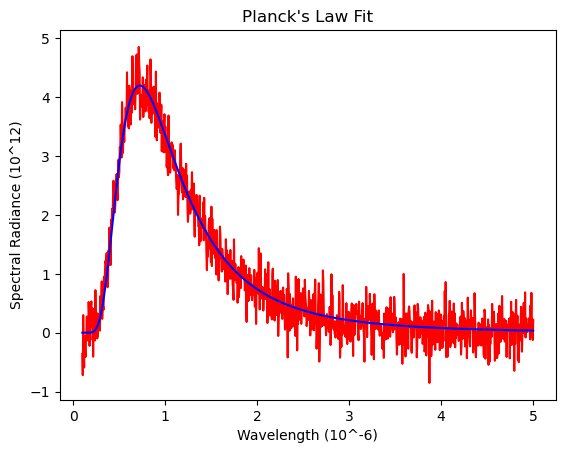

In [116]:
h, c, k, t = h_fit3, c_fit3, k_fit3, T_fit3
x_data3 = np.array(x_data3, dtype=float)
y_est3 = planck(np.array(x_data3), h, c, k, t) 
plt.xlabel('Wavelength (10^-6)')
plt.ylabel('Spectral Radiance (10^12)')
plt.title("Planck's Law Fit")
plt.plot(x_data3, y_data3, color = 'r')
plt.plot(x_data3, y_est3, color='b')
plt.show()

# d4

In [131]:
def planck_fixed_constants(wavelength, T):
    h = 6.626  
    c = 3      
    k = 1.38  
    exponent = (h * c) / (wavelength * k * T)
    return (2 * h * c**2) / (wavelength**5 * (np.exp(np.clip(exponent, None, 700)) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data4, y_data4)

T_fit4 = params[0]
#normalizing T
print(f"Estimated T: {T_fit4 * 10**3}")

Estimated T: 3908.0363608949356


In [132]:
def planck_fixed_constants(wavelength, h):
    T = T_fit4 
    c = 3      
    k = 1.38   
    return (2 * h * c * c) / ((wavelength ** 5) * ((np.exp(np.clip((h * c) / (wavelength * k * T), None, 700))) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data4, y_data4)

h_fit4 = params[0]
#normalizing h
print(f"Estimated h: {h_fit4 * 10**-34}")


Estimated h: 6.623650427457902e-34


In [133]:
def planck_fixed_constants(wavelength, c):
    T = T_fit4 
    h = h_fit4      
    k = 1.38   
    return (2 * h * c * c) / ((wavelength ** 5) * ((np.exp(np.clip((h * c) / (wavelength * k * T), None, 700))) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data4, y_data4)

c_fit4 = params[0]
#normalizing c
print(f"Estimated c: {c_fit4 * 10**8}")


Estimated c: 299770009.9588182


In [134]:
def planck_fixed_constants(wavelength, k):
    T = T_fit4 
    h = h_fit4     
    c = c_fit4   
    return (2 * h * c * c) / ((wavelength ** 5) * ((np.exp(np.clip((h * c) / (wavelength * k * T), None, 700))) - 1))

params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data4, y_data4)

k_fit4 = params[0]
#normalizing k
print(f"Estimated k: {k_fit4 * 10** -34}")

Estimated k: 1.3789835095785645e-34


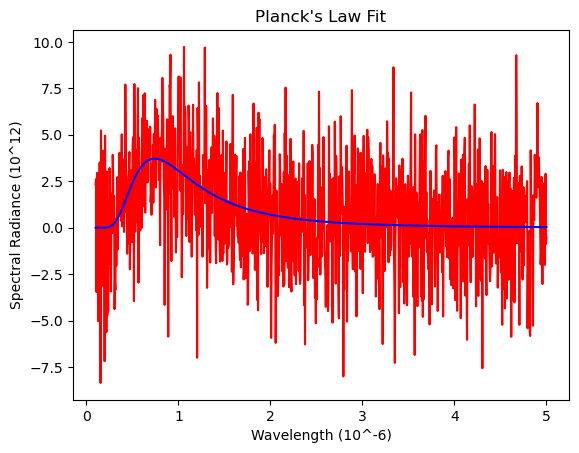

In [117]:
h, c, k, t = h_fit4, c_fit4, k_fit4, T_fit4
x_data4 = np.array(x_data4, dtype=float)
y_est4 = planck(np.array(x_data4), h, c, k, t) 
plt.xlabel('Wavelength (10^-6)')
plt.ylabel('Spectral Radiance (10^12)')
plt.title("Planck's Law Fit")
plt.plot(x_data4, y_data4, color = 'r')
plt.plot(x_data4, y_est4, color='b')
plt.show()